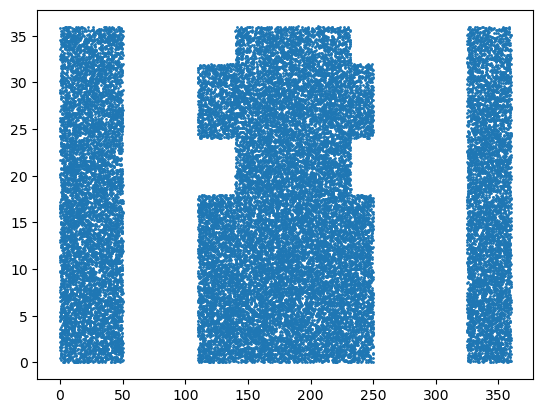

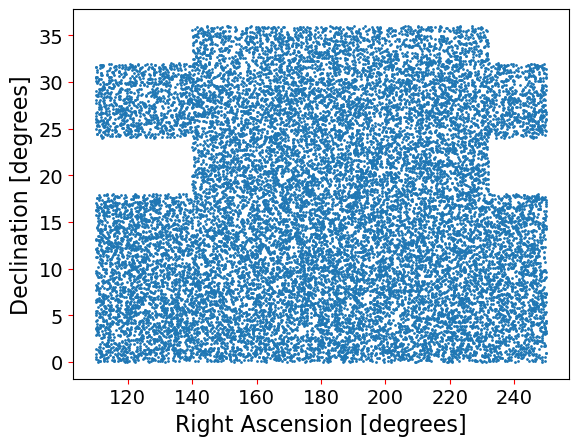

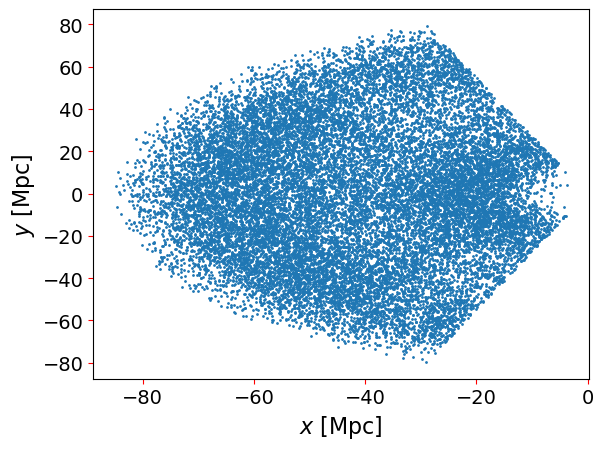

In [1]:
#importando as principais bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import randomsdss

#importando o catalogo ALFALFA
data = np.genfromtxt('data.csv', names=True, delimiter=',')

alfa  = data['RAdeg_HI']
delta = data['DECdeg_HI']
veloc = data['Vhelio']
code  = data['HIcode']
dist  = data['Dist']

# removendo hemisferio sul e outros codigos

x = alfa[(code==1.)&(veloc>0.)&(veloc<6000.)&(dist<85.)&(dist>20.)]
y = delta[(code==1.)&(veloc>0.)&(veloc<6000.)&(dist<85.)&(dist>20.)]
v = veloc[(code==1.)&(veloc>0.)&(veloc<6000.)&(dist<85.)&(dist>20.)]
d = dist[(code==1.)&(veloc>0.)&(veloc<6000.)&(dist<85.)&(dist>20.)]

#calculando o redshift
c = 3. * (10 ** 5)

z = v / c

#gerando uma distribuicao uniforme de pontos
N = 200000

x_rand = np.random.uniform(0., 360., N)

y_rand = np.random.uniform(np.sin(np.deg2rad(-90.)), np.sin(np.deg2rad(+90.)), N)
y_rand = np.rad2deg(np.arcsin(y_rand))




#selecionando a regiao norte

c1 = (y_rand>0.) & (y_rand<36.)

x1r = x_rand[c1]
y1r = y_rand[c1]

c2 = (x1r>50.) & (x1r<110.)

x2r = np.delete(x1r, c2)
y2r = np.delete(y1r, c2)

c3 = (x2r>250.) & (x2r<325.)

x3r = np.delete(x2r, c3)
y3r = np.delete(y2r, c3)

c4 = (x3r>110.) & (x3r<140.) & (y3r>18.) & (y3r<24.)

x4r = np.delete(x3r, c4)
y4r = np.delete(y3r, c4)

c5 = (x4r>232.) & (x4r<250.) & (y4r>18.) & (y4r<24.)

x5r = np.delete(x4r, c5)
y5r = np.delete(y4r, c5)

c6 = (x5r>232.) & (x5r<250.) & (y5r>32.) & (y5r<36.)

x6r = np.delete(x5r, c6)
y6r = np.delete(y5r, c6)

c7 = (x6r>110.) & (x6r<140.) & (y6r>32.) & (y6r<36.)

x7r = np.delete(x6r, c7)
y7r = np.delete(y6r, c7)

plt.scatter(x7r, y7r, s=1)
plt.show()

plt.tick_params(labelsize=14,color='red')
plt.xlabel('Right Ascension [degrees]', fontsize=16)
plt.ylabel('Declination [degrees]', fontsize=16)
plt.scatter(x7r[(x7r>100)&(x7r<300)], y7r[(x7r>100)&(x7r<300)], s=1)
plt.savefig('HI_random_footprint.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Distribuicao de redshift

zr = randomsdss.z_random(z, size=len(x7r))

dr = c * zr / 70.

#gerando os pontos com base nas distancias calculadas com a distribuicao de redshift
from astropy.coordinates import spherical_to_cartesian

X, Y, Z = spherical_to_cartesian(dr, np.deg2rad(y7r), np.deg2rad(x7r))


# salvando os resultados

N = X[X<0], Y[X<0], Z[X<0]

np.savetxt('random_HI.dat', np.transpose(N), delimiter='\t', 
           header='x y z')

plt.tick_params(labelsize=14,color='red')
plt.xlabel(r'$x$ [Mpc]', fontsize=16)
plt.ylabel(r'$y$ [Mpc]', fontsize=16)
plt.scatter(X[X<0], Y[X<0], s=1)
plt.savefig('HI_random_cartesian.pdf', format='pdf', dpi=300, bbox_inches='tight')




In [2]:
len(X[X<0])

21100